# Exploring birdcalls 🎵🐦


* [1. Introduction](#section1)
* [2. The dataset](#section2)
    * [2.1. Examples](#section2a)
    * [2.2. Explore](#section2b)
* [3. Birds and call types](#section3)


<a class="anchor" id="section1"></a> 
# Introduction 

Birds are really beautiful creatures, and they are present in many different environments. I like to observe their behavior, they can be very cute. This time we will focus on their songs. Recording bird songs helps in monitoring the bird population. It is interesting that this also reflects the biological balance, and the life quality of a region. So it is worth investigating them.

<a class="anchor" id="section2"></a> 
# The dataset

We have got mp3 files with the birdsongs grouped into folders by species, and csv files with more details about them:

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
i = 0

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        if "mp3" in filename:
            i = i + 1
            if i < 5:
                print(os.path.join(dirname, filename))
        else:
            print(os.path.join(dirname, filename))
print("...")
print(i, "mp3 files")
print("5 csv files")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

path = "/kaggle/input/birdsong-recognition/"
test_audio_meta = pd.read_csv(path + "example_test_audio_metadata.csv")
test_audio_sum = pd.read_csv(path + "example_test_audio_summary.csv")
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")
sample = pd.read_csv(path + "sample_submission.csv")

The train.csv has numerous attributes, like filename, country, species and much more.

In [ ]:
print("train.csv dimension:", train.shape)
pd.set_option('display.max_columns', None)
train[train["ebird_code"] == "easblu"].head(2)

<a class="anchor" id="section2a"></a> 
## Examples 

Birds can be checked out on the  [https://ebird.org](https://ebird.org) site using the **ebird_code** attribute, for example the **Easter Bluebird** can be seen here: [https://ebird.org/species/easblu](https://ebird.org/species/easblu)

### The Eastern Bluebird

In [ ]:
bluebird = path + "train_audio/" + "easblu/" + "XC134674.mp3"
x, sr = librosa.load(bluebird)
ipd.Audio(bluebird)

 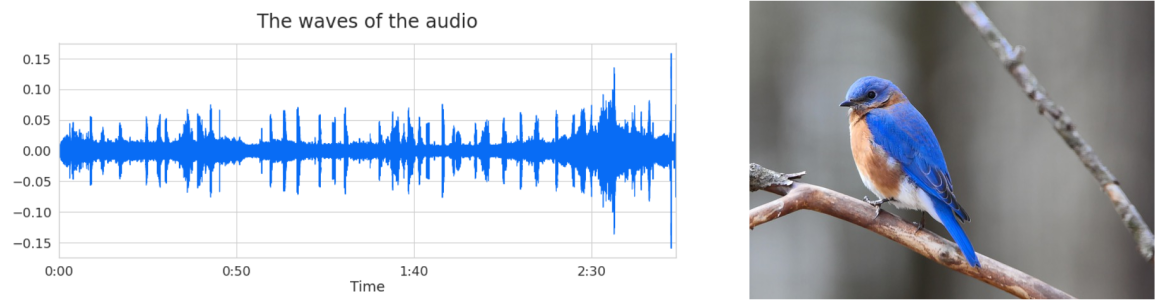

In [ ]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

plt.figure(figsize=(14, 5))
plt.title("The waves of the audio", fontsize=24, pad=20)
librosa.display.waveplot(x, sr=sr, color = "#086cf5")
warnings.simplefilter('ignore')

### The Rufous Hummingbird

In [ ]:
rufhumm = path + "/train_audio" + "/rufhum" + "/XC133552.mp3"
x, sr = librosa.load(rufhumm)
ipd.Audio(rufhumm)

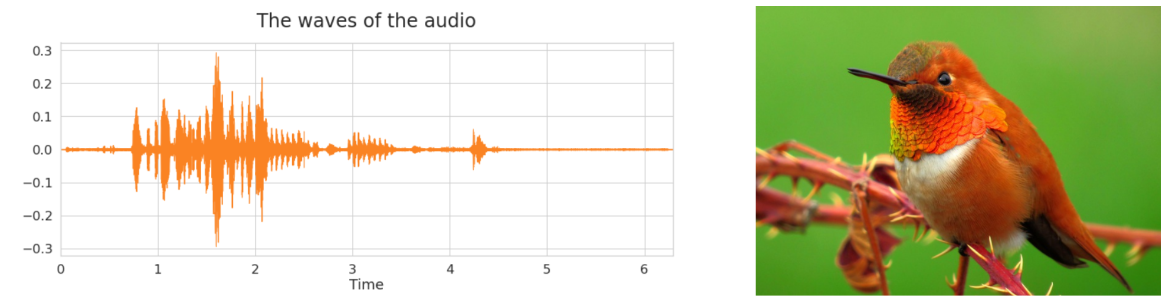

In [ ]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

plt.figure(figsize=(14, 5))
plt.title("The waves of the audio", fontsize=24, pad=20)
librosa.display.waveplot(x, sr=sr, color = "#fa8323")
warnings.simplefilter('ignore')

<a class="anchor" id="section2b"></a> 
## Explore
Here are the birdcodes with the full names. 

In [ ]:
t = train[["ebird_code", "species"]].drop_duplicates()
t.head()

We can easily put together links to check the wikipedia page about the birds and display in an Iframe.

In [ ]:
from IPython.display import IFrame
from IPython.core.display import display

birds = [bird.replace(" ", "_") for bird in t["species"].values]

display(IFrame('https://en.wikipedia.org/wiki/' + birds[253], '100%', '400px'))

<a class="anchor" id="section3"></a> 
## Birds and call types

There are 264 birt species in the dataset, and more than half of them have 100 sound files. Hover over the bars to see the bird and the count of sound files.

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, Span, FixedTicker
output_notebook()

bird_counts_df = train.groupby(['ebird_code', 'species']).count()[['type']].sort_values(by="type")
bird_counts_df = bird_counts_df.rename(columns={"type": "sound_file_count"})
bird_counts_df = bird_counts_df.reset_index()

source = ColumnDataSource(data = bird_counts_df)

p = figure(x_range = bird_counts_df["species"].values, plot_height =250, plot_width = 1100,
           title="Count of sound files per bird species (All: 264 species)",tools="", toolbar_location=None)
p.vbar(x="species", top="sound_file_count", width=0.5, source = source)

p.xgrid.grid_line_color = None
p.y_range.start = 0

p.add_tools(HoverTool(
    tooltips=[
        ( 'specie', '@{species}'),
        ( 'sound file count', '@{sound_file_count}'), # use @{ } for field names with spaces
    ]
))

p.xaxis.ticker = [ 33, 66, 99, 132 ]

p.xaxis.ticker = FixedTicker(ticks=[ 33, 66, 99, 132]) 
p.xaxis.major_label_overrides = dict(zip([ 33, 66, 99, 132], [ '12.5%', '25%', '37.5%', '50%']))

# Vertical line
vline_12 = Span(location=33, dimension='height', line_color='grey', line_width=1)
vline_25 = Span(location=66, dimension='height', line_color='grey', line_width=1)
vline_37 = Span(location=99, dimension='height', line_color='grey', line_width=1)
vline_50 = Span(location=132, dimension='height', line_color='grey', line_width=1)

p.renderers.extend([vline_12, vline_25,vline_37, vline_50])

show(p)

Now let's see the types:

In [ ]:
types = list(set(list(train["type"].values)))
print(len(types))
df = train.groupby(['type']).count()[['species']]
df.head()